<a href="https://colab.research.google.com/github/jjhbk/AI_course/blob/main/Chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Thompson Sampling for Slot Machines

# Importing the libraries
import numpy as np

# Setting conversion rates and the number of samples
conversionRates = [0.15, 0.04, 0.13, 0.11, 0.05]
N = 10000
d = len(conversionRates)

# Creating the dataset
X = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        if np.random.rand() < conversionRates[j]:
            X[i][j] = 1

# Making arrays to count our losses and wins
nPosReward = np.zeros(d)
nNegReward = np.zeros(d)

# Taking our best slot machine through beta distibution and updating its losses and wins
for i in range(N):
    selected = 0
    maxRandom = 0
    for j in range(d):
        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
        if randomBeta > maxRandom:
            maxRandom = randomBeta
            selected = j
    if X[i][selected] == 1:
        nPosReward[selected] += 1
    else:
        nNegReward[selected] += 1

# Showing which slot machine is considered the best
nSelected = nPosReward + nNegReward 

for i in range(d):
    print('Machine number ' + str(i + 1) + ' was selected ' + str(nSelected[i]) + ' times')
print('Conclusion: Best machine is machine number ' + str(np.argmax(nSelected) + 1))

Relative Return: -91 %


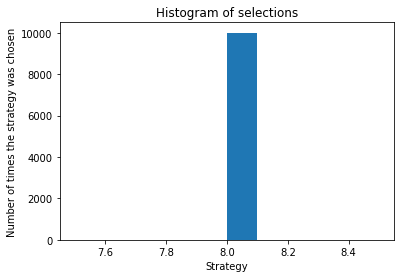

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
N=10000;
d=9;
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01];
X= np.array(np.zeros([N,d]));
for i in range (N):
  for j in range (d):
    if np.random.rand() <= conversion_rates [j]:
      X[i,j]= 1;
strategies_selected_rs=[];
strategies_selected_ts=[];
total_reward_rs=0;
total_reward_ts=0;
numbers_of_rewards_1= [0]*d;
numbers_of_rewards_0=[0]*d;

for i in range (0,N):
  strategy_rs= random.randrange(d);
  strategies_selected_rs.append(strategy_rs);
  reward_rs= X[i,strategy_rs];
  total_reward_rs+= reward_rs;
  strategy_ts=0;
  max_random=0;
  for j in range(0,d):
    random_beta= random.betavariate(numbers_of_rewards_1[j]+1,numbers_of_rewards_0[j]+1);
    if random_beta>max_random:
      maxrandom= random_beta;
      strategy_ts=j;
  rewards_ts=X[i,strategy_ts];
  if rewards_ts==1:
    numbers_of_rewards_1[strategy_ts]+=1;
  else:
    numbers_of_rewards_0[strategy_ts]+=1;
  strategies_selected_ts.append(strategy_ts);
  total_reward_ts+= rewards_ts;
# Computing the Relative Return
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100;
print("Relative Return: {:.0f} %".format(relative_return));
plt.hist(strategies_selected_ts);
plt.title('Histogram of selections');
plt.xlabel('Strategy');
plt.ylabel('Number of times the strategy was chosen');
plt.show();

  


  
